# Explore here

Se han recopilado datos socio demográficos y de recursos de salud por condado en los Estados Unidos y queremos descubrir si existe alguna relación entre los recursos sanitarios y los datos socio demográficos.

Para ello, es necesario que establezcas una variable objetivo (relacionada con la salud) para llevar a cabo el análisis.

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm



In [125]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
datacore = data.copy()

data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [126]:

# Para mostrar *todas* las columnas en la consola:
print(list(data.columns))

['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with les

Miramos variables importantes para nuestro modelo y limpiamos variables. La variable anycondition_prevalence generalmente representa la prevalencia de al menos una condición médica crónica en la población del condado. Es decir, el porcentaje de personas que tienen una o más enfermedades entre un conjunto predefinido de condiciones (por ejemplo: diabetes, EPOC, enfermedades cardiovasculares, enfermedades renales crónicas, etc.).

Opcion 1:

In [127]:
datacore = data.drop(columns=[x for x in data.select_dtypes(include="object")])

X = datacore.drop(columns=["anycondition_prevalence"])  # variables predictoras
y = datacore["anycondition_prevalence"] 
#X= sm.add_constant(X)
Y= datacore["anycondition_prevalence"] #Varibale objetivo
#print(X.dtypes)
#print(Y.dtypes)
model= sm.OLS(Y, X).fit() 
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     anycondition_prevalence   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 3.213e+05
Date:                     Wed, 07 May 2025   Prob (F-statistic):               0.00
Time:                             04:48:23   Log-Likelihood:                 4207.8
No. Observations:                     3140   AIC:                            -8222.
Df Residuals:                         3043   BIC:                            -7635.
Df Model:                               96                                         
Covariance Type:                 nonrobust                                         
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [128]:
# Extraer el resumen del modelo como un DataFrame
summary_df = model.summary2().tables[1]  # La tabla 1 tiene coeficientes, p-valores, etc.

# Filtrar variables con p-value < 0.05
significant_vars = summary_df[summary_df["P>|t|"] < 0.05]

# Mostrar variables significativas
print("Variables significativas (p < 0.05):")
print(significant_vars)

Variables significativas (p < 0.05):
                               Coef.  Std.Err.          t         P>|t|  \
anycondition_Lower 95% CI   0.477888  0.007181  66.547591  0.000000e+00   
anycondition_Upper 95% CI   0.520412  0.007086  73.444340  0.000000e+00   
Obesity_Upper 95% CI       -0.051035  0.012689  -4.022158  5.906955e-05   
Heart disease_prevalence    0.092609  0.029222   3.169127  1.544144e-03   
Heart disease_Upper 95% CI -0.057578  0.022441  -2.565742  1.034301e-02   
COPD_prevalence             0.118340  0.023651   5.003544  5.948309e-07   
COPD_Lower 95% CI          -0.088353  0.017985  -4.912676  9.458869e-07   
COPD_Upper 95% CI          -0.036319  0.015758  -2.304785  2.124561e-02   
diabetes_prevalence         0.226443  0.027548   8.219960  2.978332e-16   
diabetes_Lower 95% CI      -0.142913  0.021203  -6.740163  1.885088e-11   
diabetes_Upper 95% CI      -0.083251  0.020770  -4.008251  6.263769e-05   

                              [0.025    0.975]  
anycondition_

Opcion 2:

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

est = LinearRegression()
selector = RFE(est, n_features_to_select=10)  # Cambia el número si quieres más o menos variables
selector = selector.fit(X, Y)

# Ver variables seleccionadas
selected_columns = X.columns[selector.support_]
print("Variables seleccionadas:", selected_columns)


Variables seleccionadas: Index(['0-9 y/o % of total pop', '10-19 y/o % of total pop',
       '20-29 y/o % of total pop', '30-39 y/o % of total pop',
       '40-49 y/o % of total pop', '50-59 y/o % of total pop',
       '60-69 y/o % of total pop', '70-79 y/o % of total pop',
       '80+ y/o % of total pop', '% Black-alone'],
      dtype='object')


Vemos que ambos metodos precentan resultados diferentes por lo que agregaremos los dos grupos o reduciremos las columnas del siguiente grupo

/tmp/ipykernel_815/1859446691.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr["anycondition_prevalence"] = data["anycondition_prevalence"]


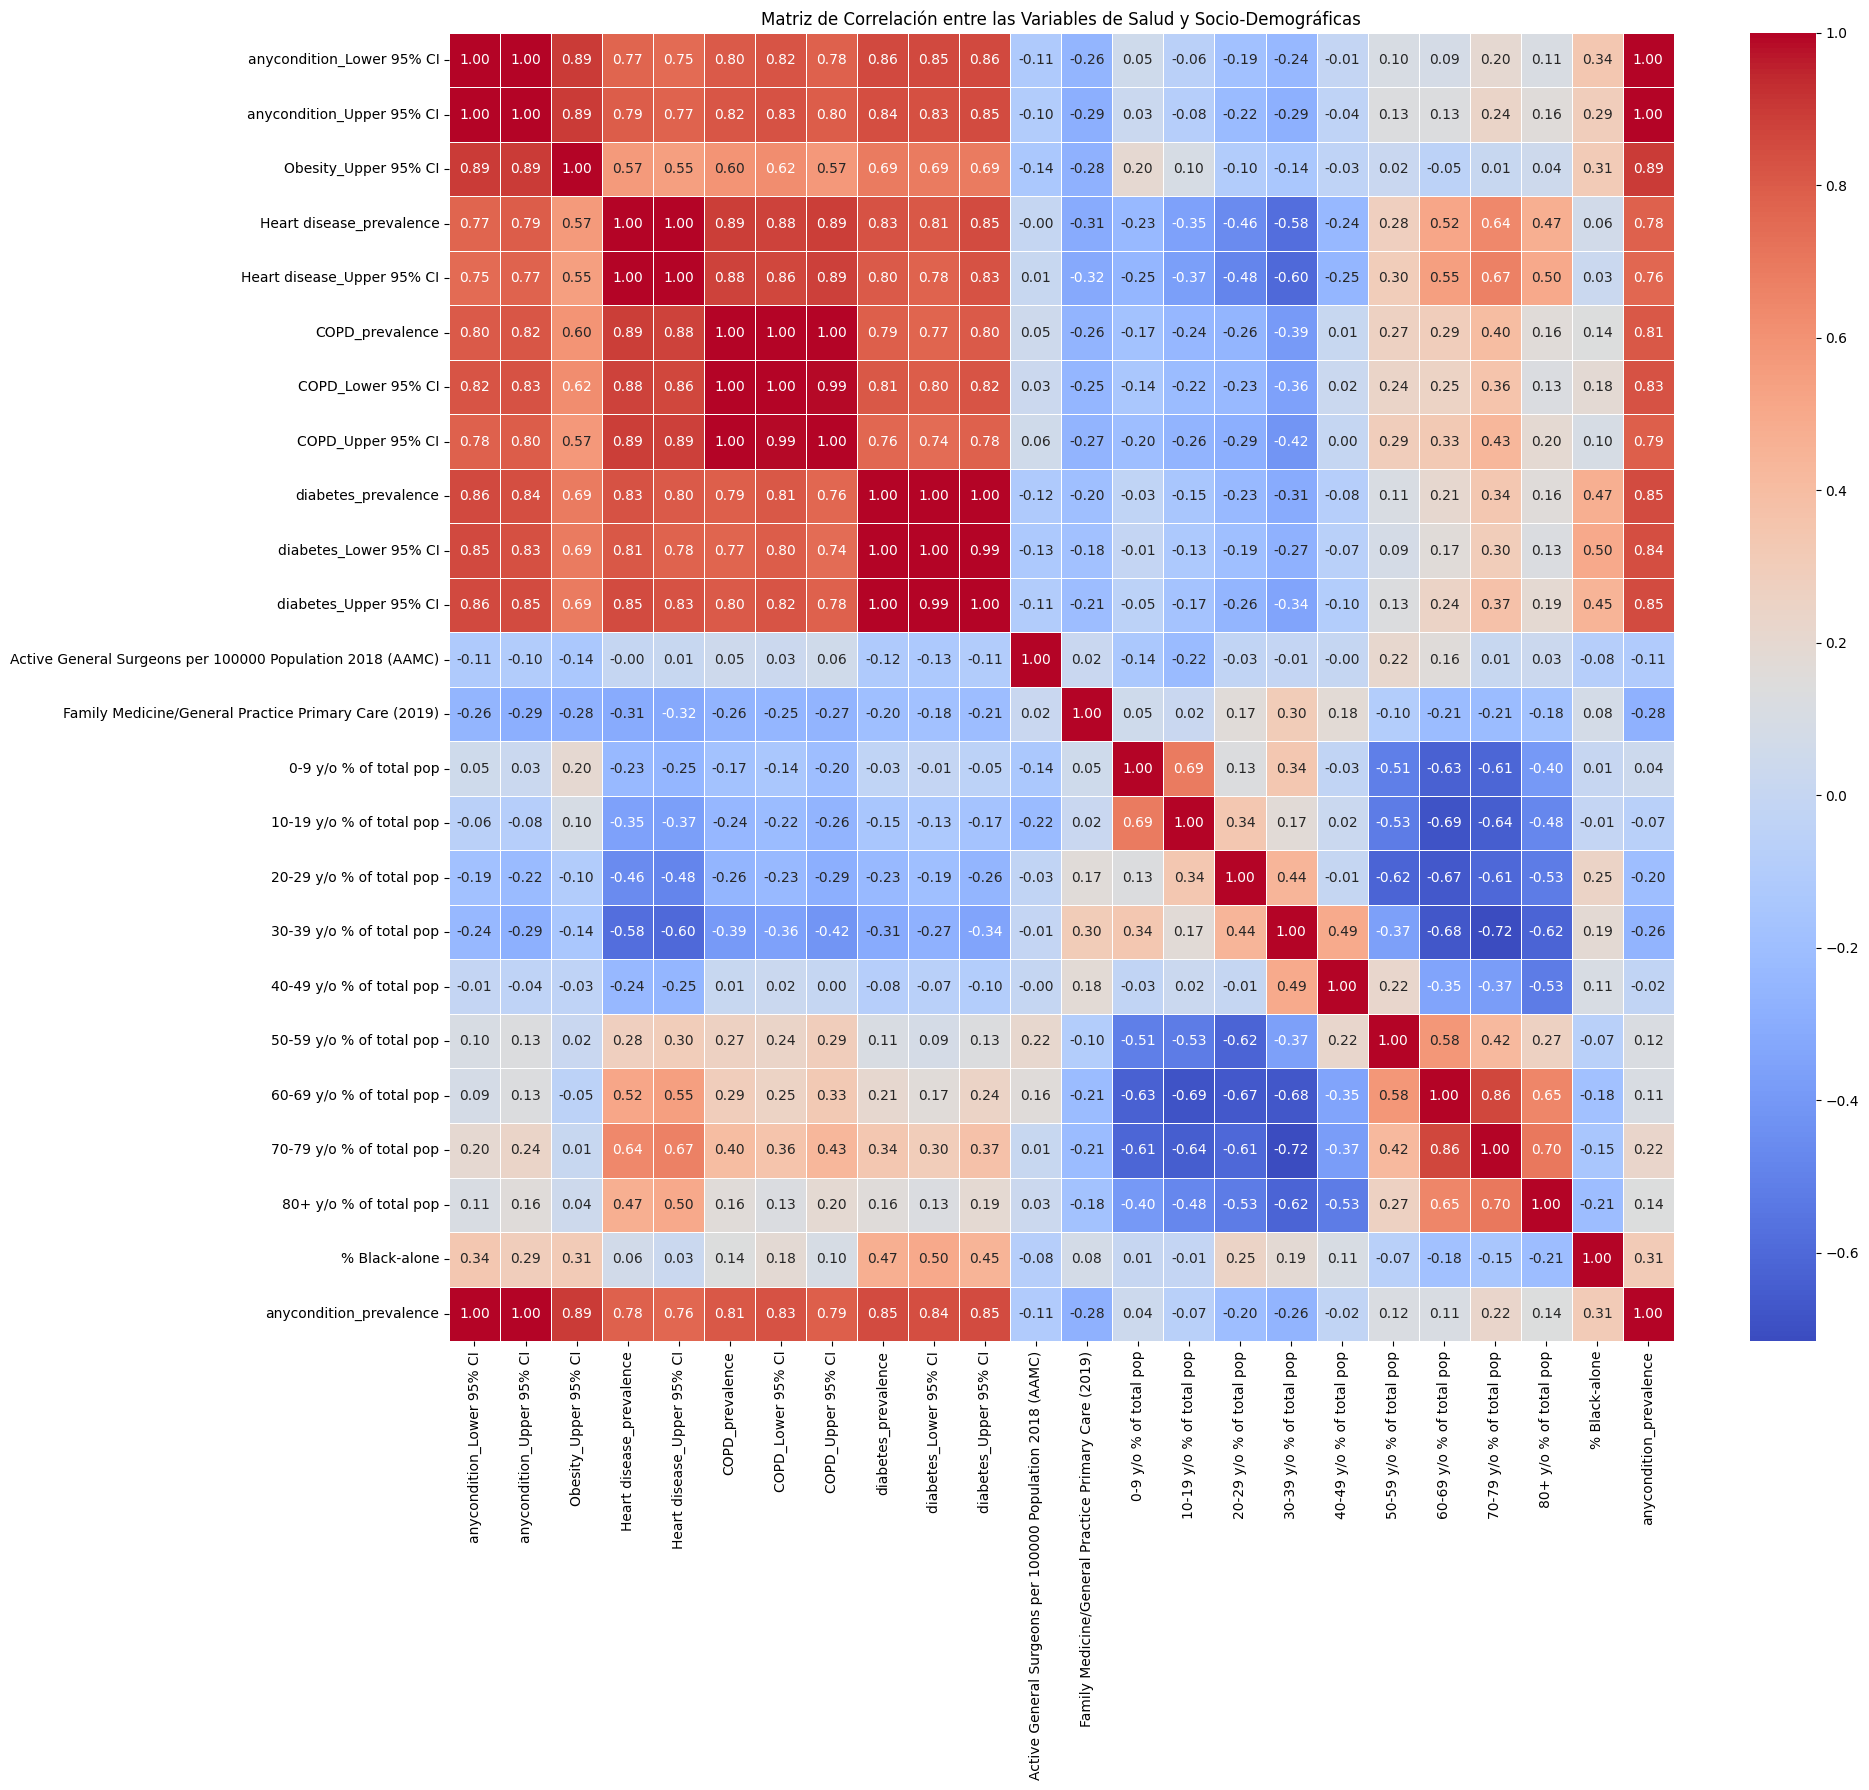

In [130]:

# Definir las variables de salud y las variables sociodemográficas
variables_importantes = ["anycondition_Lower 95% CI",   
"anycondition_Upper 95% CI",   
"Obesity_Upper 95% CI",       
"Heart disease_prevalence" ,   
"Heart disease_Upper 95% CI" ,
"COPD_prevalence",            
"COPD_Lower 95% CI",          
"COPD_Upper 95% CI",         
"diabetes_prevalence",         
"diabetes_Lower 95% CI",      
"diabetes_Upper 95% CI",
'Active General Surgeons per 100000 Population 2018 (AAMC)',
'Family Medicine/General Practice Primary Care (2019)']

variables_sociodemograficas = ['0-9 y/o % of total pop', '10-19 y/o % of total pop',
       '20-29 y/o % of total pop', '30-39 y/o % of total pop',
       '40-49 y/o % of total pop', '50-59 y/o % of total pop',
       '60-69 y/o % of total pop', '70-79 y/o % of total pop',
       '80+ y/o % of total pop', '% Black-alone']

# Combinar las dos listas de columnas
variables = variables_importantes + variables_sociodemograficas


# Crear DataFrame filtrado con las variables seleccionadas
df_corr = data[variables]
df_corr["anycondition_prevalence"] = data["anycondition_prevalence"]
# Calcular matriz de correlación
matriz_corr = df_corr.corr()

# Crear el gráfico de correlación con Seaborn
plt.figure(figsize=(20, 18))  # Ajusta el tamaño de la figura
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Añadir título y ajustar visualización
plt.title("Matriz de Correlación entre las Variables de Salud y Socio-Demográficas")
plt.tight_layout()
plt.show()


En modelos lineales buscamos no tener multicolinealidad entre nuestras variables. Por lo que reduciremos el numero de variables redundantes y crearemos otra matriz de correlacion



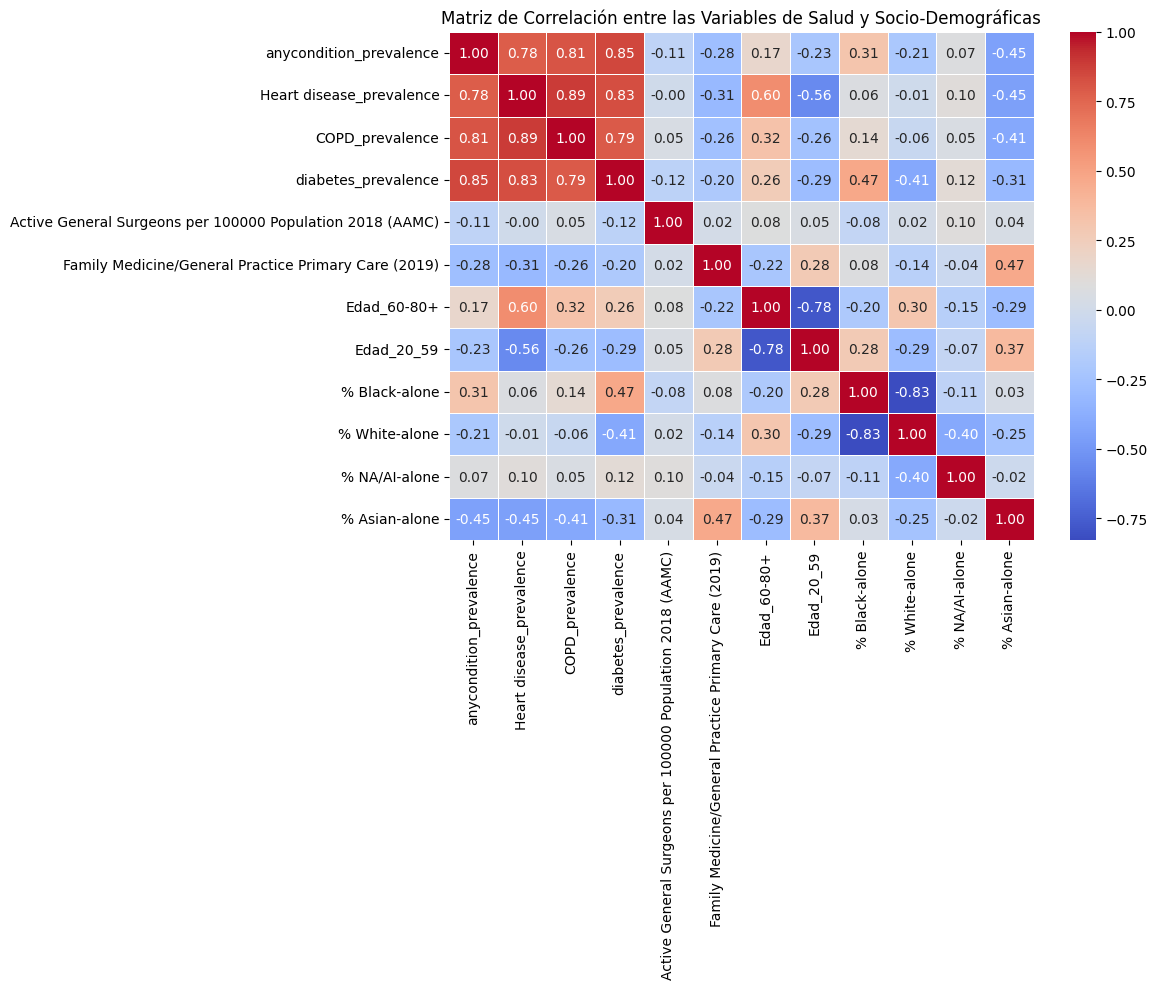

In [131]:
# Crear nuevas columnas agrupadas en el DataFrame original
data["Edad_0_19"] = data["0-9 y/o % of total pop"] + data["10-19 y/o % of total pop"]
data["Edad_20_59"] = (
    data["20-29 y/o % of total pop"] +
    data["30-39 y/o % of total pop"] +
    data["40-49 y/o % of total pop"] +
    data["50-59 y/o % of total pop"]
)
data["Edad_60-80+"] = (
    data["60-69 y/o % of total pop"] +
    data["70-79 y/o % of total pop"] +
    data["80+ y/o % of total pop"]
)

# Crear un nuevo DataFrame solo con las variables agrupadas y % Black-alone
variables_sociodemograficas_agrupadas = ["Edad_60-80+", "Edad_20_59", "% Black-alone","% White-alone","% NA/AI-alone","% Asian-alone"]
df_sociodemografico = data[variables_sociodemograficas_agrupadas]

# Combinar en columnas (axis=1)
df_corr2 = pd.concat([ data[["anycondition_prevalence"]],  data[variables_importantes], df_sociodemografico], axis=1)

#Eliminar columnas
df_corr2 = df_corr2.drop(columns=['anycondition_Lower 95% CI','anycondition_Upper 95% CI','Obesity_Upper 95% CI','COPD_Lower 95% CI', 'COPD_Upper 95% CI','Heart disease_Upper 95% CI','diabetes_Lower 95% CI', 'diabetes_Upper 95% CI'])
matriz_corr = df_corr2.corr()

# Crear el gráfico de correlación con Seaborn
plt.figure(figsize=(12, 10))  # Ajusta el tamaño de la figura
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Añadir título y ajustar visualización
plt.title("Matriz de Correlación entre las Variables de Salud y Socio-Demográficas")
plt.tight_layout()
plt.show()

In [132]:

df_corr2.columns

Index(['anycondition_prevalence', 'Heart disease_prevalence',
       'COPD_prevalence', 'diabetes_prevalence',
       'Active General Surgeons per 100000 Population 2018 (AAMC)',
       'Family Medicine/General Practice Primary Care (2019)', 'Edad_60-80+',
       'Edad_20_59', '% Black-alone', '% White-alone', '% NA/AI-alone',
       '% Asian-alone'],
      dtype='object')

Como podemos ver existe una relacion entre las personas de raza negra o afroamericanas, tienen mas prevalencia de padecer una enfermedad como diabetes.

Al igual podemos ver que personas con tercera edad o mas pueden tener mas prevalencia a diabetes o una enferemdad relacionada al corazon.

como podemos ver no existe tanta relacion en edades mas jovenes con la prevalencia de diabetes o enfermedades relacionadas al corazon. Por lo que solo nos enfocaremos en personas de mas de 20 años.



GRAFICOS DE INFORMACION POR EDAD, Y ETNIA

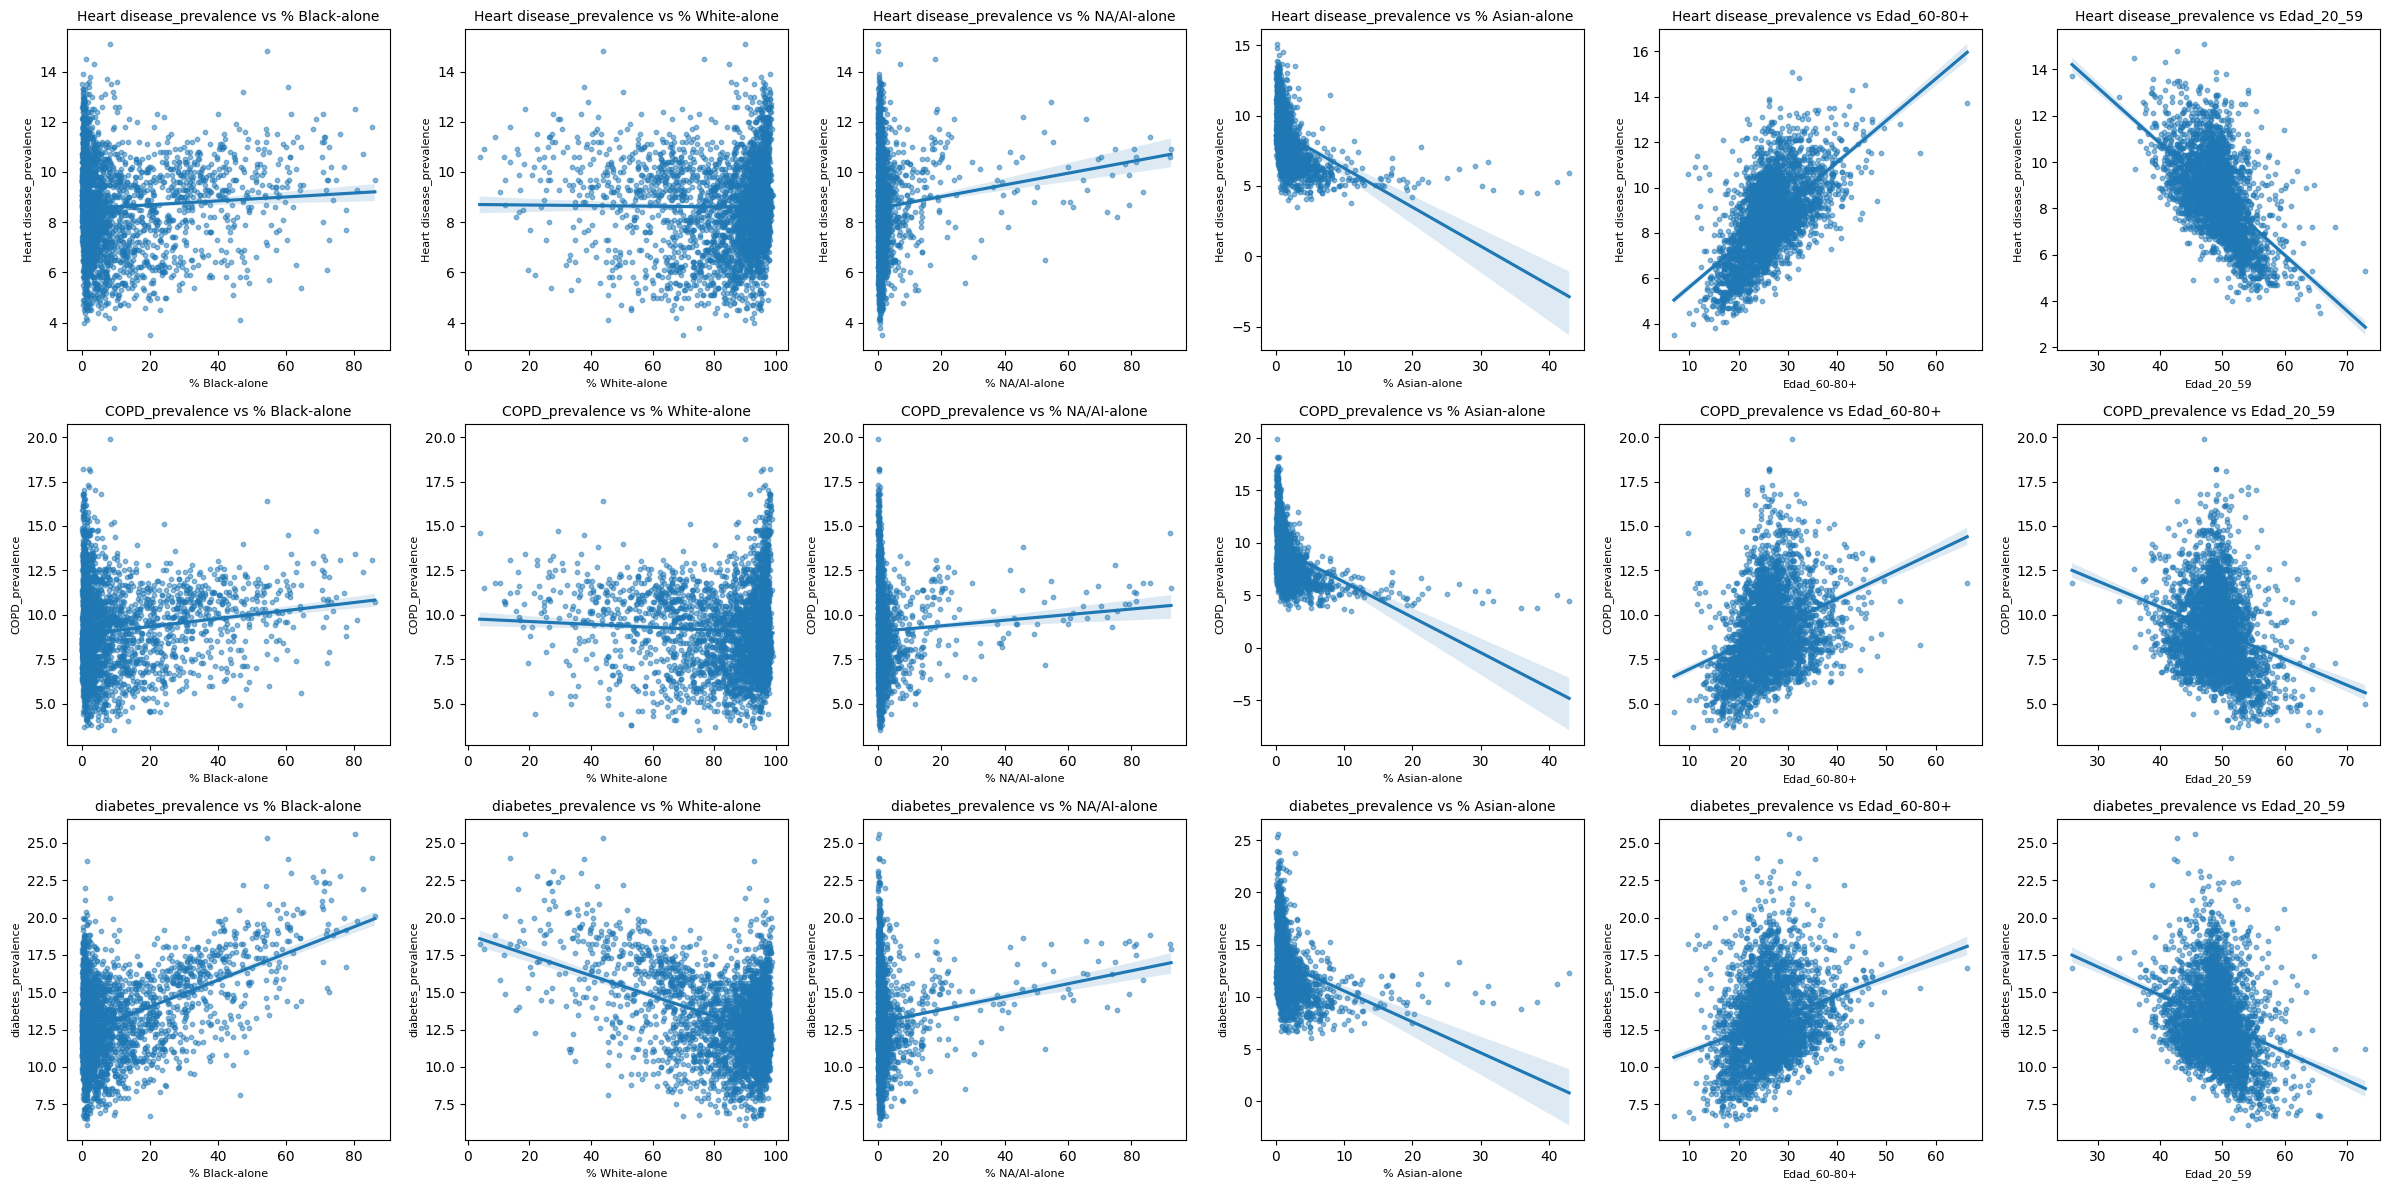

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables
enfermedades = ['Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence']
demograficos = ['% Black-alone', '% White-alone', '% NA/AI-alone', '% Asian-alone', 'Edad_60-80+', 'Edad_20_59']

# Preparar figura
fig, axes = plt.subplots(3, 6, figsize=(24, 12))  # 3 filas × 6 columnas

# Plano lineal de ejes para fácil iteración
axes = axes.flatten()

# Contador de subplot
i = 0

# Crear cada gráfico
for enfermedad in enfermedades:
    for demografico in demograficos:
        sns.regplot(
            x=data[demografico],
            y=data[enfermedad],
            ax=axes[i],
            scatter_kws={'alpha': 0.5, 's': 10}
        )
        axes[i].set_title(f'{enfermedad} vs {demografico}', fontsize=10)
        axes[i].set_xlabel(demografico, fontsize=8)
        axes[i].set_ylabel(enfermedad, fontsize=8)
        i += 1

# Ajustar diseño
plt.tight_layout()
plt.show()

Podemos ver que en la etnia blanca, la mayoria de las personas tiene prevalencia a problemas relacionados con el corazon.

In [ ]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(5, 4))

# Colores personalizados por grupo de vecindario
colores = {
    "Brooklyn": "#1f77b4",     # Azul suave 
    "Manhattan": "#ffbf00",    # Amarillo dorado 
    "Queens": "#2ca02c",       # Verde fuerte 
    "Staten Island": "#d62728",# Rojo clásico 
    "Bronx": "#9467bd" 
}

# Gráfico de precios promedios por grupos de vecindarios
avg_price = data.groupby(["room_type", "neighbourhood_group"])["price"].mean().reset_index()
sns.barplot(
    data=avg_price,
    x="room_type",
    y="price",
    hue="neighbourhood_group",
    palette=colores,
    ax=ax
)

# Mostrar el gráfico
plt.show()


MODELO DE REGRESION LINEAL

In [140]:
data_model = df_corr2
X = data_model.drop(columns=['anycondition_prevalence'])
#X =sm.add_constant(X)
Y=data_model["anycondition_prevalence"]

model = sm.OLS(Y,X)
resultados = model.fit()
resultados.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     anycondition_prevalence   R-squared (uncentered):                   0.997
Model:                                 OLS   Adj. R-squared (uncentered):              0.997
Method:                      Least Squares   F-statistic:                          8.368e+04
Date:                     Wed, 07 May 2025   Prob (F-statistic):                        0.00
Time:                             04:48:50   Log-Likelihood:                         -7630.5
No. Observations:                     3140   AIC:                                  1.528e+04
Df Residuals:                         3129   BIC:                                  1.535e+04
Df Model:                               11                                                  
Covariance Type:                 nonrobust                                                  
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Heart disease_prevalence                                      1.6026      0.143     11.241      0.000       1.323       1.882
COPD_prevalence                                               0.2818      0.063      4.486      0.000       0.159       0.405
diabetes_prevalence                                           1.0570      0.060     17.543      0.000       0.939       1.175
Active General Surgeons per 100000 Population 2018 (AAMC)    -0.1109      0.041     -2.697      0.007      -0.192      -0.030
Family Medicine/General Practice Primary Care (2019)         -0.0017      0.000     -3.946      0.000      -0.002      -0.001
Edad_60-80+                                                  -0.2746      0.018    -15.287      0.000      -0.310      -0.239
Edad_20_59                                                    0.0914      0.020      4.595      0.000       0.052       0.130
% Black-alone                                                 0.2065      0.015     13.429      0.000       0.176       0.237
% White-alone                                                 0.2129      0.013     16.471      0.000       0.188       0.238
% NA/AI-alone                                                 0.1711      0.015     11.313      0.000       0.141       0.201
% Asian-alone                                                -0.0365      0.029     -1.243      0.214      -0.094       0.021
==============================================================================
Omnibus:                       63.517   Durbin-Watson:                   1.395
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.134
Skew:                          -0.147   Prob(JB):                     2.71e-25
Kurtosis:                       3.882   Cond. No.                         467.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

#Variables predictoras y objetivo
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
model_lineal = LinearRegression()
model_lineal.fit(X_train,y_train)

#Predicciones
y_pred_lineal = model_lineal.predict(X_test)

# Evaluar el modelo
print("Regresión Lineal (sin regularización):")
print("MSE:", mean_squared_error(y_test, y_pred_lineal))
print("R2:", r2_score(y_test, y_pred_lineal))

Regresión Lineal (sin regularización):
MSE: 7.4895063715897034
R2: 0.8202972116895039


[49.75268763 38.86888297 64.12098306 43.98405331 37.95680469 38.50504543
 43.27807026 57.52770782 43.686861   37.14278634 43.89865048 57.42815503
 39.27532723 50.91630706 41.96648803 47.92380807 45.1432565  49.3702372
 56.15829791 44.90791993 51.45367399 47.01107273 44.25756388 49.77873099
 44.69053316 40.4376445  33.46752035 45.84030209 42.83254254 55.07258706
 59.65345242 54.94393972 51.23686561 46.7173115  42.62557328 55.18107037
 50.69719635 41.33200068 46.63321897 39.83501618 54.64173426 43.26316337
 43.23789351 44.41364713 43.34776864 53.57016844 48.3903332  49.63630052
 54.13491162 59.44369252 48.63648662 64.73788694 42.96721664 52.40231258
 47.68667104 56.92138685 41.82589868 43.56221809 48.68179161 44.88028234
 36.77043638 46.80412659 48.52947137 38.20195374 44.75984755 41.26859708
 44.32242948 46.51602939 46.06929185 44.02860346 41.88591315 54.85342094
 48.87651371 47.94450007 45.50873113 38.41323421 46.74815134 41.43109155
 45.20374061 48.31867865 54.23168639 37.07349217 34.

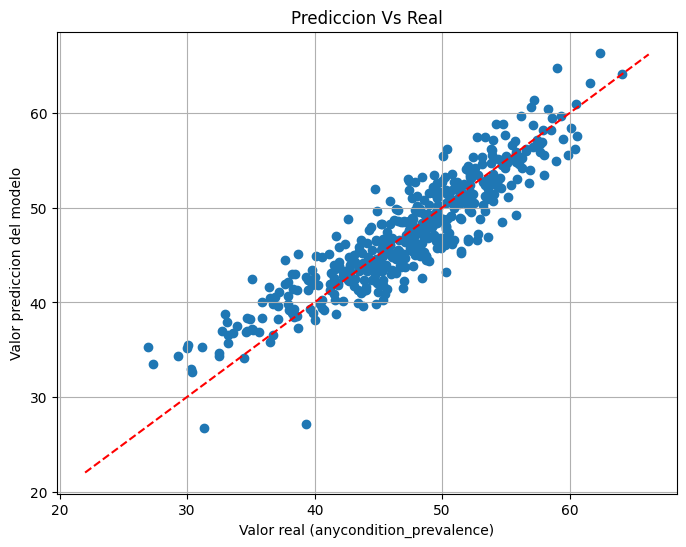

In [143]:
print(y_pred_lineal)
#Grafica de dispersion 
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=y_pred_lineal)
plt.xlabel("Valor real (anycondition_prevalence)")
plt.ylabel("Valor prediccion del modelo")
plt.title("Prediccion Vs Real")
plt.plot([Y.min(), Y.max()],[Y.min(), Y.max()], "r--")
plt.grid(True)
plt.show()

MODELO DE REGRESION LINEAL CON REGULARIZACION 

In [144]:
import numpy as np
from sklearn.linear_model import LassoCV

# Crear una lista de alphas entre 0.01 y 20 
alphas = np.linspace(0.01, 20, 100)  # 100 valores uniformemente distribuidos

# LassoCV con validación cruzada
model_lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
model_lasso_cv.fit(X_train, y_train)

# Mostrar el mejor alpha encontrado
print("Mejor alpha:", model_lasso_cv.alpha_)

# Predicciones
y_pred_lasso_cv = model_lasso_cv.predict(X_test)

# Evaluación
print("Regresión Lasso con CV (alpha hasta 20):")
print("MSE:", mean_squared_error(y_test, y_pred_lasso_cv))
print("R2:", r2_score(y_test, y_pred_lasso_cv))

Mejor alpha: 0.01
Regresión Lasso con CV (alpha hasta 20):
MSE: 7.468791926163559
R2: 0.8207942329104891


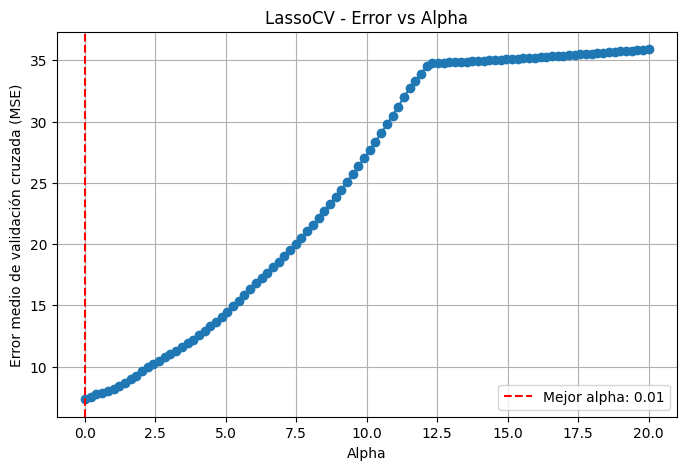

In [145]:
import matplotlib.pyplot as plt

# Graficar error de validación cruzada vs alpha
plt.figure(figsize=(8, 5))
plt.plot(model_lasso_cv.alphas_, model_lasso_cv.mse_path_.mean(axis=1), marker='o')
plt.axvline(model_lasso_cv.alpha_, color='r', linestyle='--', label=f'Mejor alpha: {model_lasso_cv.alpha_:.2f}')
plt.xlabel('Alpha')
plt.ylabel('Error medio de validación cruzada (MSE)')
plt.title('LassoCV - Error vs Alpha')
plt.legend()
plt.grid(True)
plt.show()

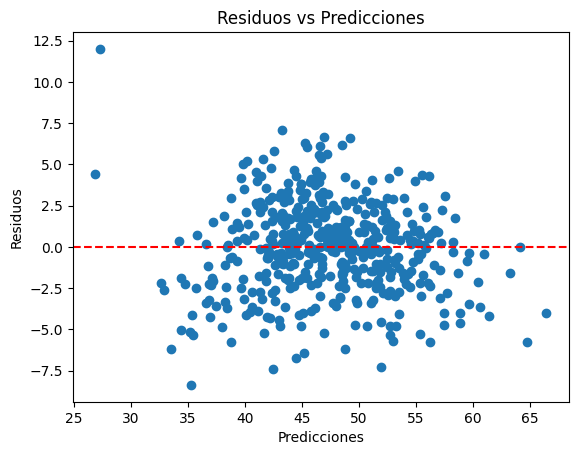

In [138]:
residuals = y_test - y_pred_lasso_cv
plt.scatter(y_pred_lasso_cv, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs Predicciones')
plt.show()

MODELO DE REGRESION LINEAL REGULARIZADO (RidgeCV)

In [146]:
from sklearn.linear_model import RidgeCV
import numpy as np

# Crear una lista de alphas entre 0.01 y 20
alphas = np.linspace(0.01, 20, 100)

# RidgeCV con validación cruzada
model_ridge_cv = RidgeCV(alphas=alphas, cv=5)
model_ridge_cv.fit(X_train, y_train)

# Mostrar el mejor alpha encontrado
print("Mejor alpha (Ridge):", model_ridge_cv.alpha_)

# Predicciones
y_pred_ridge_cv = model_ridge_cv.predict(X_test)

# Evaluación
print("Regresión Ridge con CV:")
print("MSE:", mean_squared_error(y_test, y_pred_ridge_cv))
print("R2:", r2_score(y_test, y_pred_ridge_cv))

Mejor alpha (Ridge): 8.288686868686868
Regresión Ridge con CV:
MSE: 7.490396453795201
R2: 0.8202758551078793
